In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
def relu(z):
    return np.maximum(z,0.0)

In [5]:
def relu_deriv(z):
    return (z>=0).astype(np.float32)

In [6]:
def prelu(z, p=0.01):
    return np.maximum(z,p*z)

In [7]:
def prelu_deriv(z, p=0.01):
    return np.where(z>=0, 1, p)

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def sigmoid_deriv(z):
    return sigmoid(z)*(1-sigmoid(z))

In [10]:
def tanh(z):
    return np.tanh(z)

In [11]:
def tanh_deriv(z):
    return 1-np.square(np.tanh(z))

In [12]:
def elu(z, a=1):
    return np.where(z>=0, z, a*(np.exp(z)-1))

In [13]:
def elu_deriv(z, a=1):
    return np.where(z>=0, 1, elu(z, a)+a)

In [14]:
def selu(z, l=1.0507, a=1.6752):
    return np.where(z>=0, l*z, l*a*(np.exp(z)-1))

In [15]:
def selu_deriv(z, l=1.0507, a=1.6752):
    return np.where(z>=0, l, selu(z, l, a)+l*a)

In [16]:
def swish(z):
    return z*sigmoid(z)

In [17]:
def swish_deriv(z):
    return sigmoid(z) + sigmoid_deriv(z)*z

In [18]:
def mish(z):
    return z*tanh(np.log(1+np.exp(z)))

In [19]:
def mish_deriv(z):
    return tanh(np.log(1+np.exp(z))) + z*(tanh_deriv(np.log(1+np.exp(z)))*(1/(1+np.exp(z)))*np.exp(z))

In [20]:
z = np.linspace(-3, 3, 1000, endpoint=True)

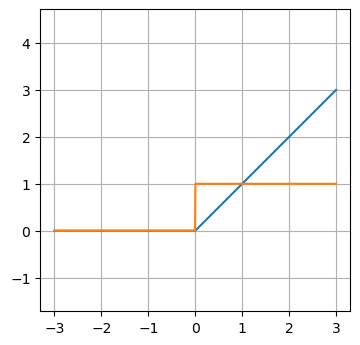

In [29]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, relu(z))
plt.plot(z, relu_deriv(z))
plt.ylim(-1, relu(z).max())
plt.grid()
plt.axis('equal');

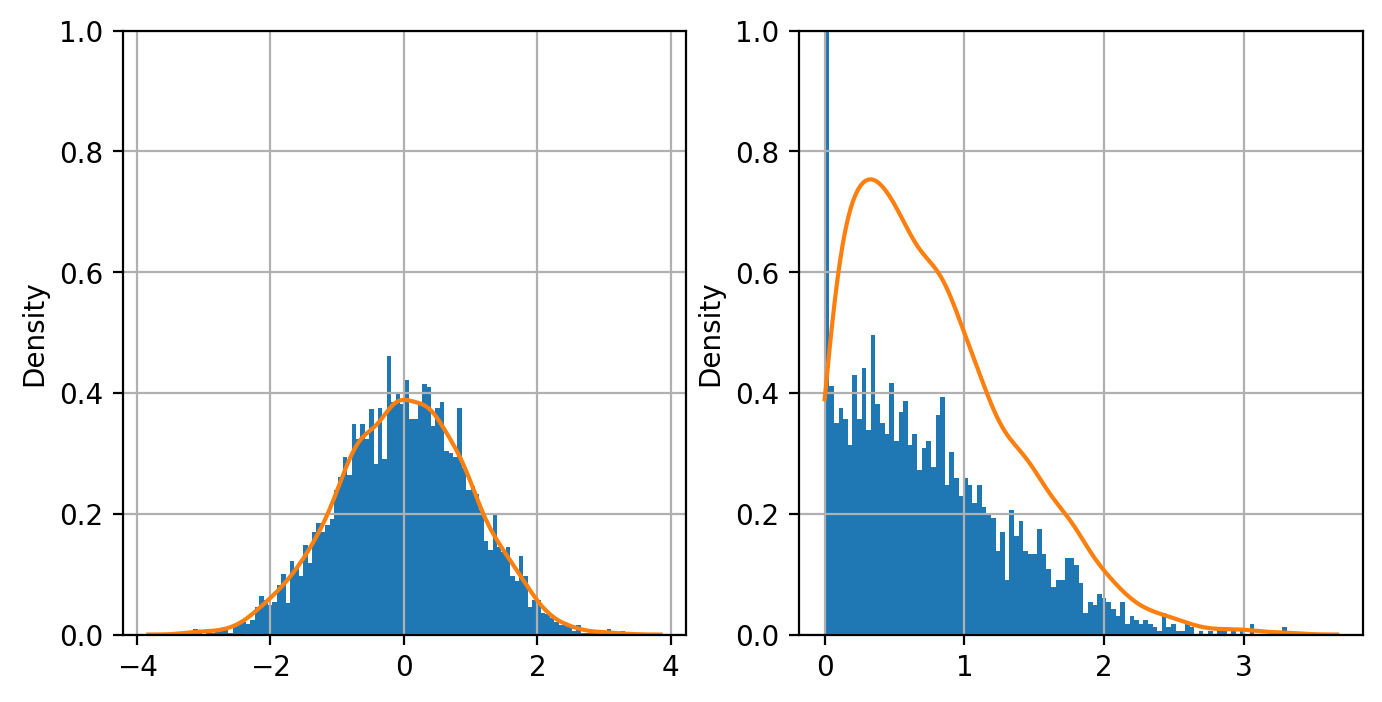

In [32]:
zn = np.random.randn(5000)
hn = relu(zn)
f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.ylim(0.0, 1.0)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn[hn>0.0], clip=[0.0, None])
plt.ylim(0.0, 1.0)
plt.grid();

In [33]:
zn.mean(), zn.var()

(0.006835702343638916, 0.9767602487127557)

In [34]:
hn.mean(), hn.var()

(0.4001569187642477, 0.324762264768053)

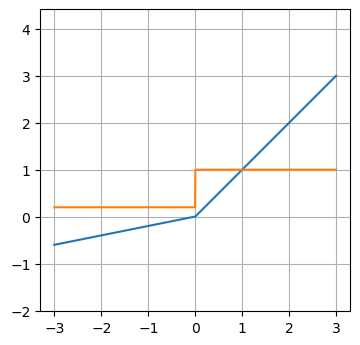

In [35]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, prelu(z, 0.2))
plt.plot(z, prelu_deriv(z, 0.2))
plt.ylim(-1, prelu(z, 0.2).max())
plt.grid()
plt.axis('equal');

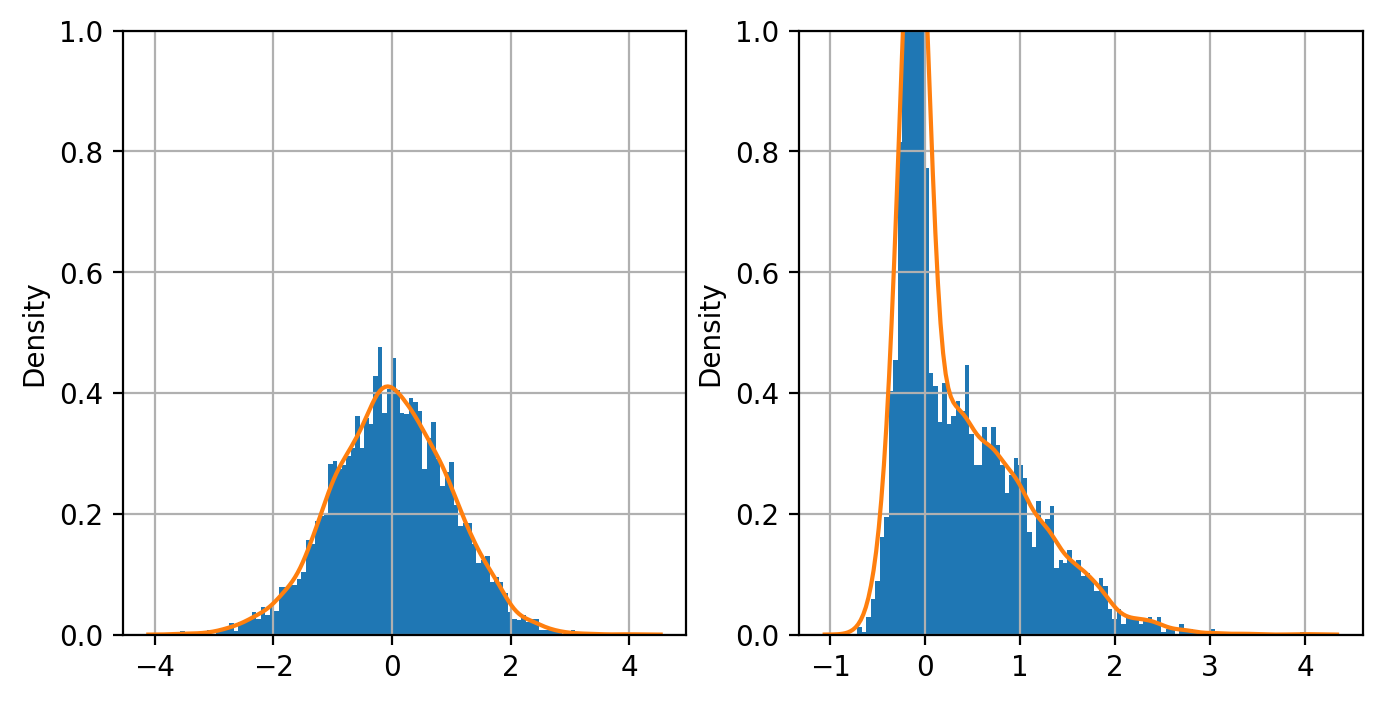

In [36]:
zn = np.random.randn(5000)
hn = prelu(zn, 0.2)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.ylim(0.0, 1.0)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn)
plt.ylim(0.0, 1.0)
plt.grid();

In [37]:
zn.mean(), zn.var()

(-0.00889885658689146, 0.9625610453208084)

In [38]:
hn.mean(), hn.var()

(0.3071502973493643, 0.3955441896041736)

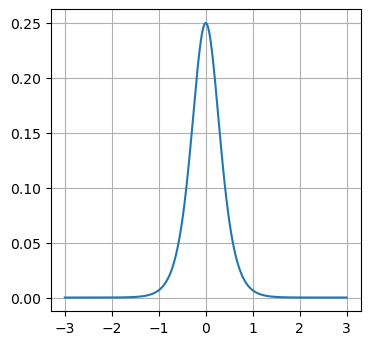

In [25]:
f = plt.figure(figsize=(4,4), dpi=100)
# plt.plot(z, sigmoid(z*5))
plt.plot(z, sigmoid_deriv(z*5))
# plt.ylim(-1, sigmoid_deriv(z*5).max())
plt.grid()
# plt.axis('equal');

Text(0.5, 1.0, 'h didstribution')

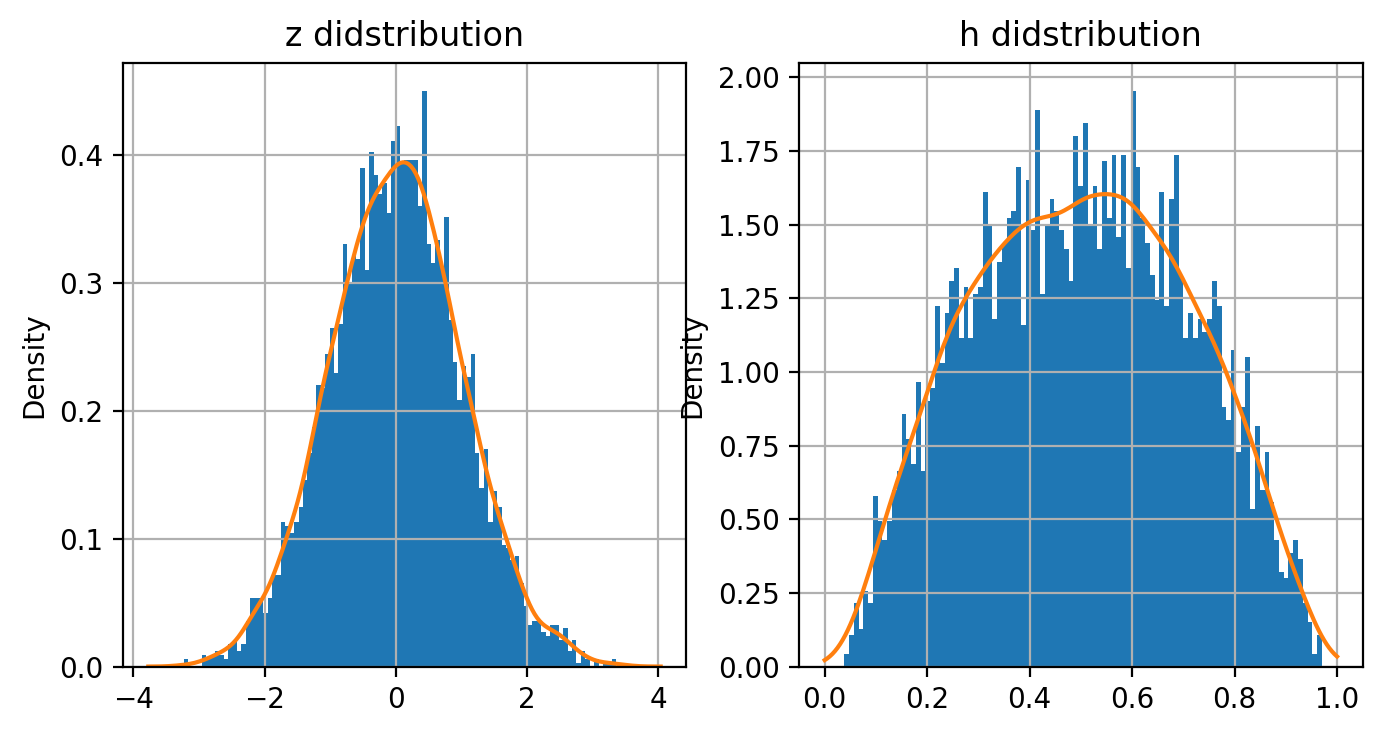

In [27]:
zn = np.random.randn(5000)
hn = sigmoid(zn)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.grid()
plt.title('z didstribution')

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn, clip=[0.0, 1.0])
plt.grid();
plt.title('h didstribution')

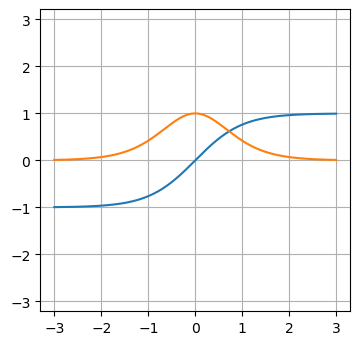

In [18]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, tanh(z))
plt.plot(z, tanh_deriv(z))
plt.ylim(-1, tanh(z).max())
plt.grid()
plt.axis('equal');

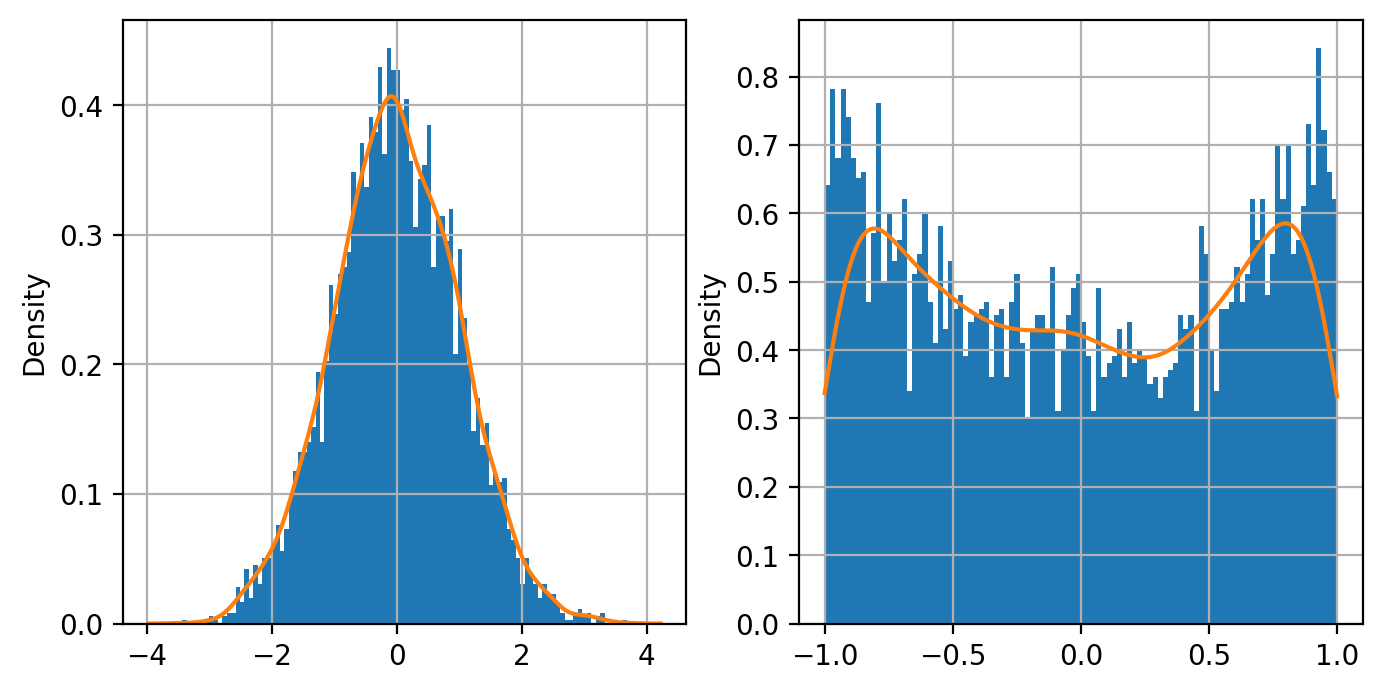

In [28]:
zn = np.random.randn(5000)
hn = tanh(zn)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn, clip=[-1.0, 1.0])
plt.grid();

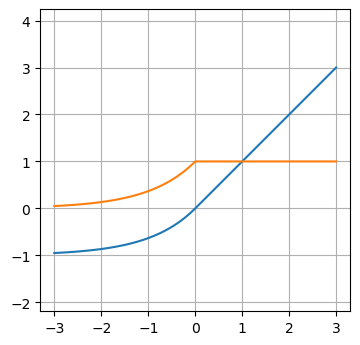

In [34]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, elu(z, a=1))
plt.plot(z, elu_deriv(z, a=1))
plt.ylim(-1, elu(z, a=1).max())
plt.grid()
plt.axis('equal');

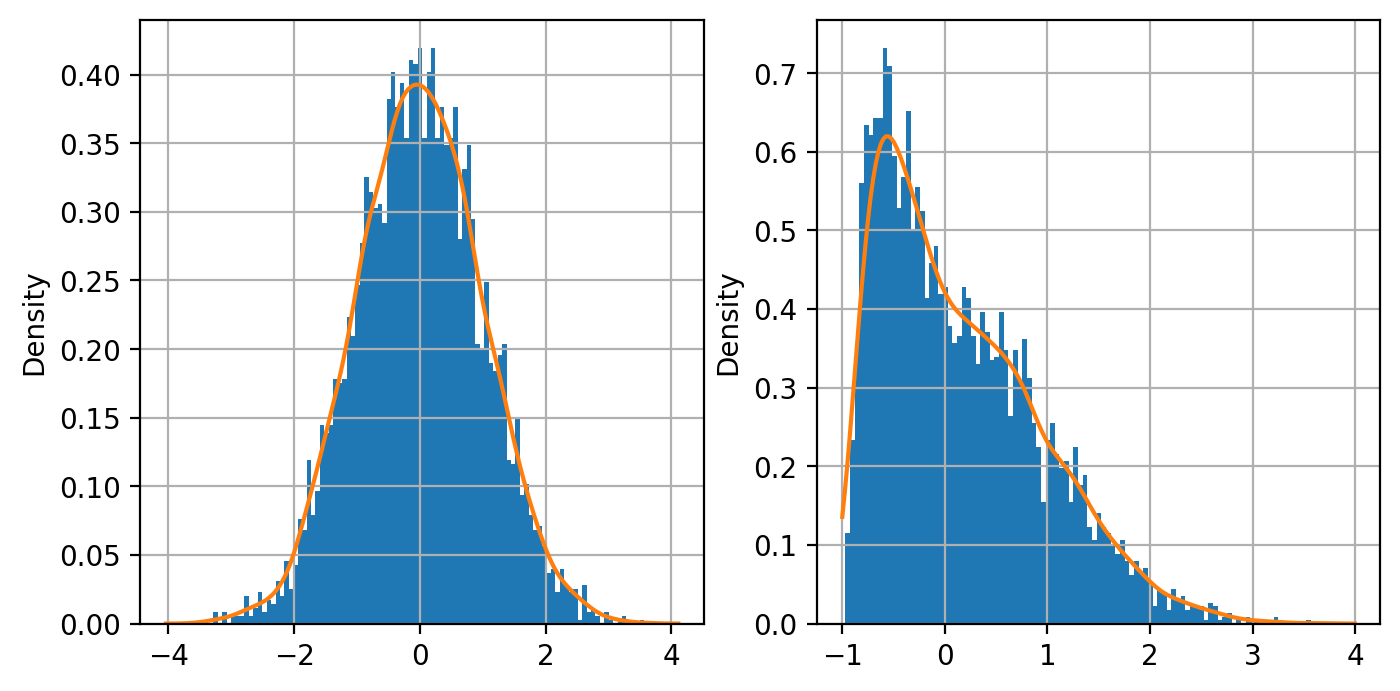

In [63]:
zn = np.random.randn(5000)
hn = elu(zn)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn, clip=[-1.0, None])
plt.grid();

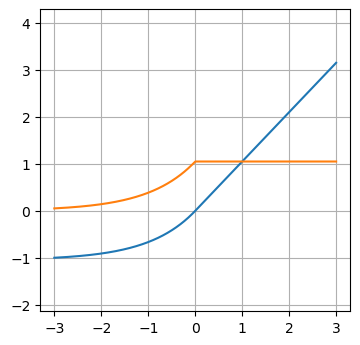

In [37]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, selu(z, a=1))
plt.plot(z, selu_deriv(z, a=1))
plt.ylim(-1, selu(z, a=1).max())
plt.grid()
plt.axis('equal');

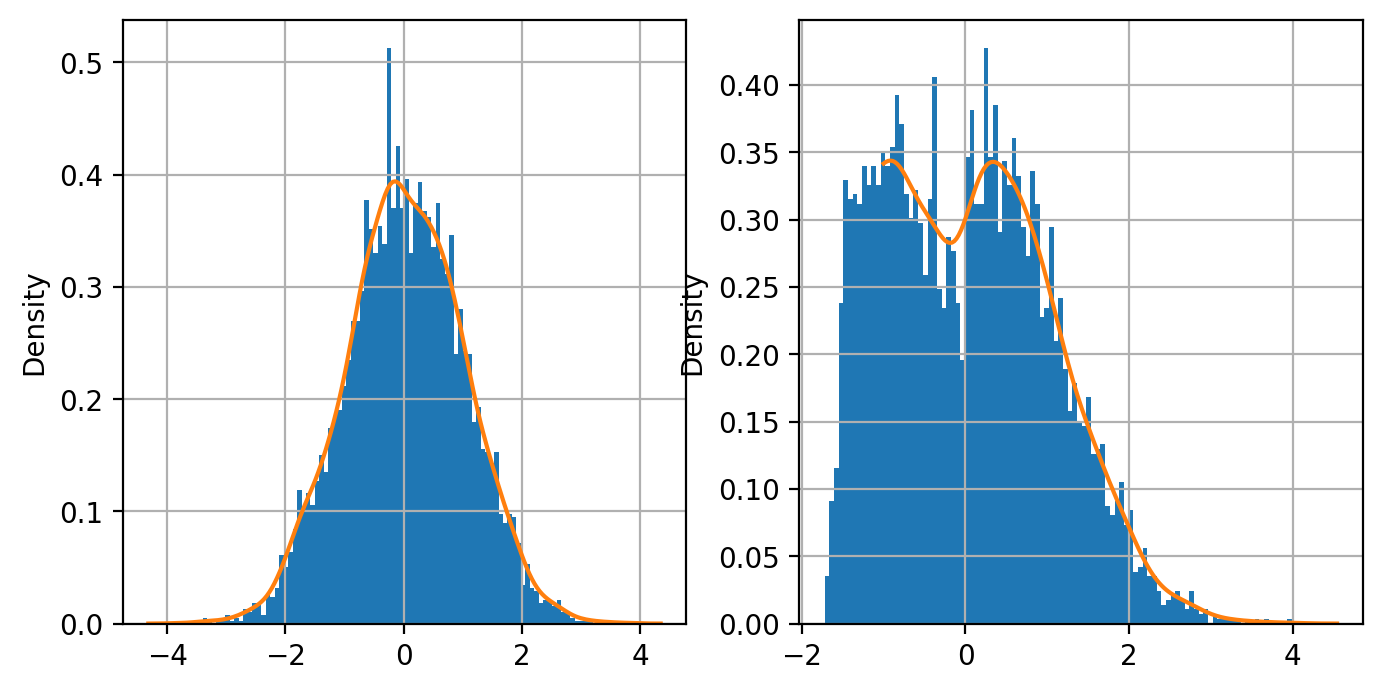

In [60]:
zn = np.random.randn(5000)
hn = selu(zn)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn, clip=[-1.0, None])
plt.grid();

In [62]:
hn.mean(), hn.var()

(0.02957489028550176, 1.0082406875094627)

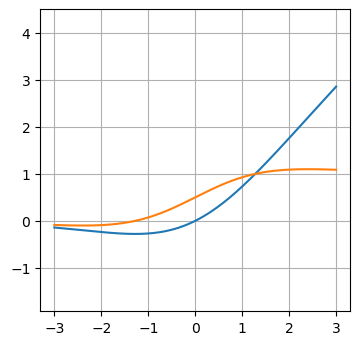

In [71]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, swish(z))
plt.plot(z, swish_deriv(z))
plt.ylim(-1, swish(z).max())
plt.grid()
plt.axis('equal');

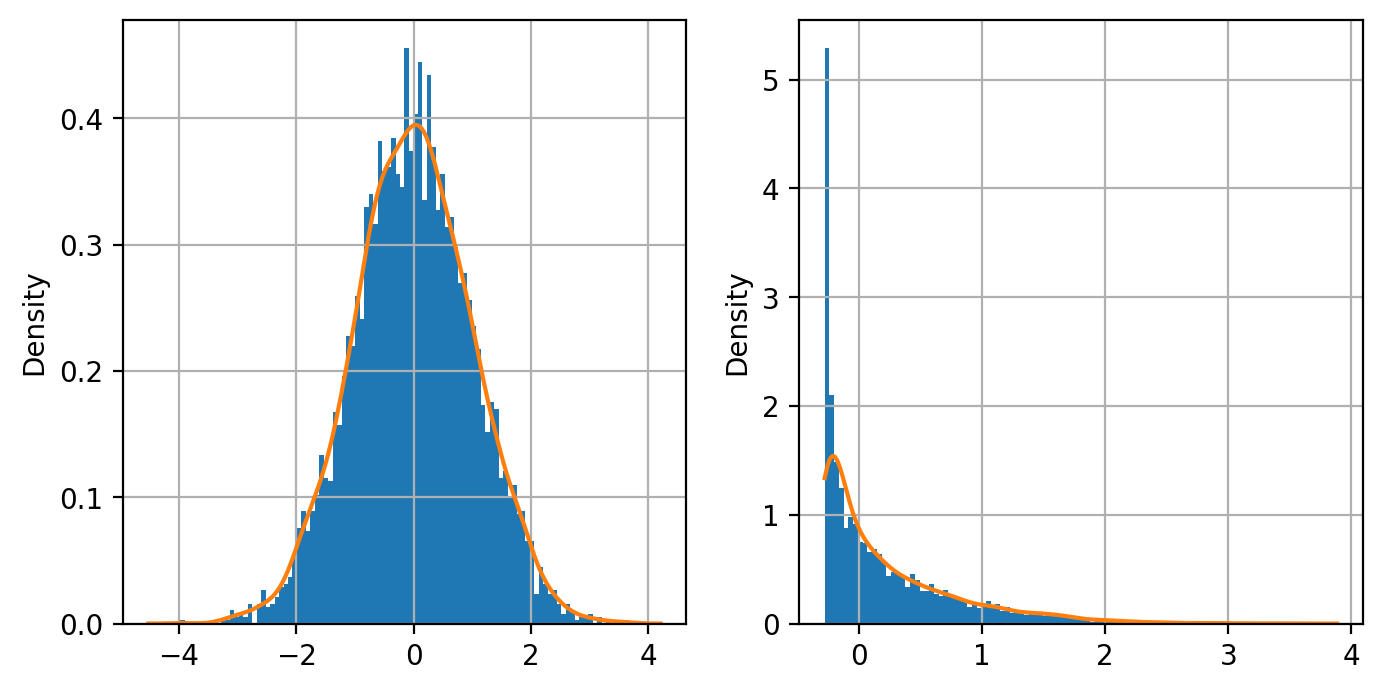

In [73]:
zn = np.random.randn(5000)
hn = swish(zn)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn, clip=[hn.min(), None])
plt.grid();

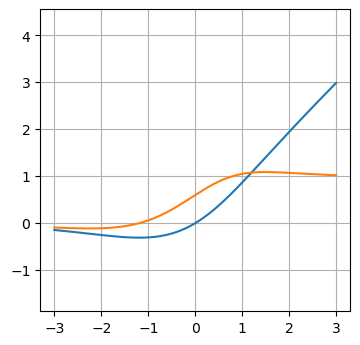

In [80]:
f = plt.figure(figsize=(4,4), dpi=100)
plt.plot(z, mish(z))
plt.plot(z, mish_deriv(z))
plt.ylim(-1, swish(z).max())
plt.grid()
plt.axis('equal');

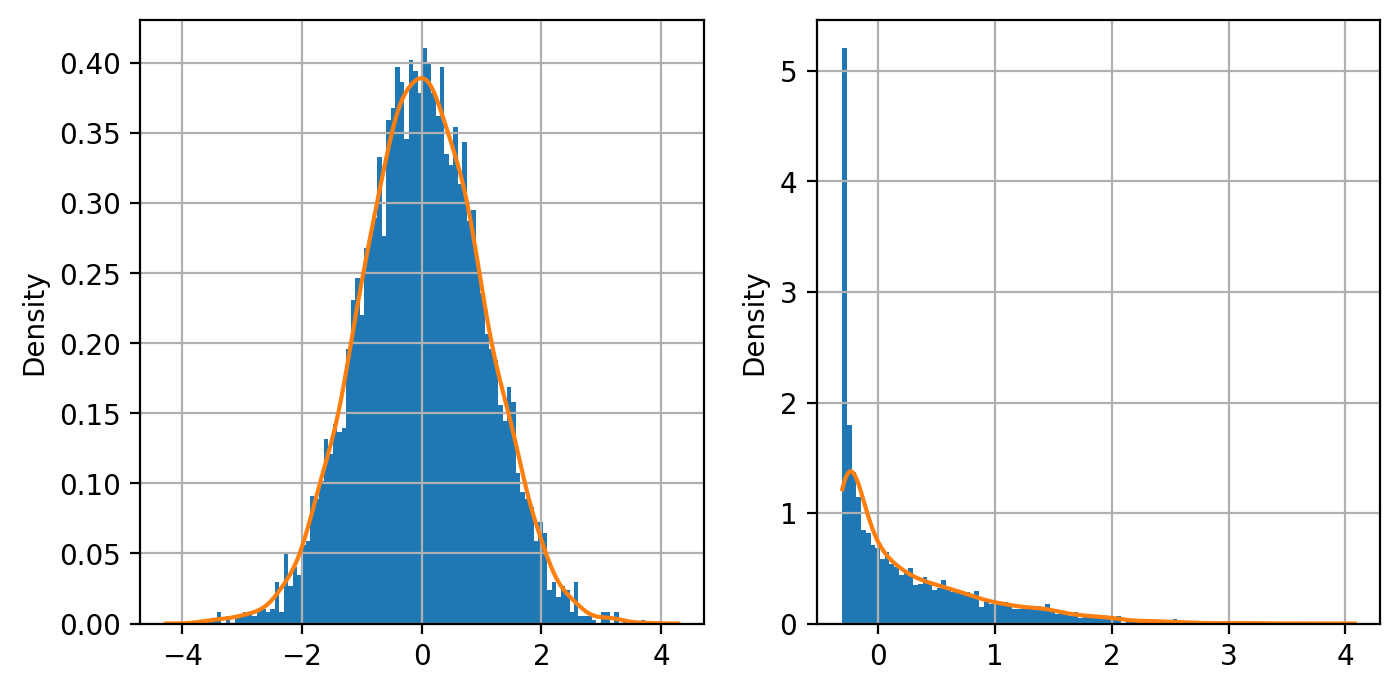

In [81]:
zn = np.random.randn(5000)
hn = mish(zn)

f = plt.figure(figsize=(8,4), dpi=200)
_ = plt.subplot(1,2,1)
plt.hist(zn, bins=100, density=True)
sns.kdeplot(zn)
plt.grid()

_ = plt.subplot(1,2,2)
plt.hist(hn, bins=100, density=True)
sns.kdeplot(hn, clip=[hn.min(), None])
plt.grid();